In [1]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from keras import optimizers, regularizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras import optimizers

random_state = 6
np.random.seed(random_state)

Using TensorFlow backend.


### Define parameters

In [2]:
filename = 'seismogram_data_cents_db.csv'
df = pd.read_csv(filename)
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1606.000000,1606.000000,1606.0,1606.000000,1606.000000,1.606000e+03,1.606000e+03,1606.000000,1606.000000
mean,451.221669,941.665095,75.003741,9.231527,50.089629,9.011473,33.163889,11.137501,21.313839,13.738046,...,-79.980776,-79.979309,-79.978603,0.0,278.243072,-0.188070,3.743952e+12,5.021586e+17,31.972242,0.323163
std,302.649662,225.061154,37.099307,35.261332,19.673425,23.210687,12.591131,14.331587,7.673028,8.545568,...,0.190952,0.217414,0.185078,0.0,7662.201633,4.893058,2.781032e+13,4.202786e+18,763.247083,0.467830
min,0.000000,487.638894,0.590916,-95.650386,9.991572,-63.162621,5.273298,-38.585637,0.495500,-20.883890,...,-80.000008,-80.000008,-80.000008,0.0,-18424.601562,-148.536407,1.145826e+00,1.647420e+08,-1.557898,0.000000
25%,200.250000,775.150225,46.703585,-14.839313,36.362204,-7.899532,24.523875,2.047651,16.663696,9.773171,...,-80.000000,-80.000000,-80.000000,0.0,-0.564912,-0.066578,1.089125e+05,4.726152e+10,-0.056514,0.000000
50%,401.000000,900.926968,74.069958,12.228716,49.900223,12.684427,31.645115,14.229327,20.592639,15.489321,...,-80.000000,-80.000000,-80.000000,0.0,0.114271,-0.004160,1.769261e+06,7.682032e+11,0.241702,0.000000
75%,684.750000,1095.790912,100.281783,35.329806,63.719153,28.028384,40.849423,22.416433,25.514643,19.247300,...,-80.000000,-80.000000,-80.000000,0.0,2.218386,0.057529,6.593582e+08,8.217131e+14,1.950677,1.000000
max,1086.000000,1572.073401,202.898203,98.485401,123.096246,64.457973,81.809122,47.306912,52.774850,39.409499,...,-73.452782,-72.382477,-74.135483,0.0,300014.312500,11.173301,3.098055e+14,6.909585e+19,27426.243439,1.000000


In [3]:
n_feature = np.shape(df)[1] - 2

X = df.iloc[:,:n_feature]
Y = df.iloc[:,-1]

X, Y = shuffle(X, Y, random_state=random_state)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)

Y_train = to_categorical(Y_train)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

input_dim = np.shape(X_train)[1]
output_dim = np.shape(Y_train)[1]

### Model setup

In [4]:
def create_baseline():
    model = Sequential()
    model.add(Dense(16, activation = 'relu', input_dim = input_dim, name='Input_layer'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'relu', name='layer_2'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32, activation = 'relu', name='layer_3'))
#     model.add(Dropout(0.2))
    model.add(Dense(4, activation = 'relu', name='layer_4'))
    model.add(Dense(output_dim, activation="softmax", name='Output_layer'))
    adam = optimizers.Adam(lr= 0.00001)
    model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [5]:
model = create_baseline()
class_weight = {0:1, 1:3}
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 1000, validation_split=0.25, class_weight = class_weight, verbose=1)

Train on 903 samples, validate on 301 samples
Epoch 1/1000
903/903 [==============================] - 0s - loss: 1.2566 - acc: 0.6268 - val_loss: 1.1449 - val_acc: 0.6744
Epoch 2/1000
903/903 [==============================] - 0s - loss: 1.2212 - acc: 0.6279 - val_loss: 1.1316 - val_acc: 0.6811
Epoch 3/1000
903/903 [==============================] - 0s - loss: 1.1939 - acc: 0.6202 - val_loss: 1.1204 - val_acc: 0.6744
Epoch 4/1000
903/903 [==============================] - 0s - loss: 1.1815 - acc: 0.6235 - val_loss: 1.1123 - val_acc: 0.6910
Epoch 5/1000
903/903 [==============================] - 0s - loss: 1.1824 - acc: 0.6268 - val_loss: 1.1076 - val_acc: 0.7043
Epoch 6/1000
903/903 [==============================] - 0s - loss: 1.1671 - acc: 0.6235 - val_loss: 1.1039 - val_acc: 0.7076
Epoch 7/1000
903/903 [==============================] - 0s - loss: 1.1519 - acc: 0.6279 - val_loss: 1.1006 - val_acc: 0.6944
Epoch 8/1000
903/903 [==============================] - 0s - loss: 1.1406 - acc

903/903 [==============================] - 0s - loss: 0.9728 - acc: 0.6855 - val_loss: 0.9227 - val_acc: 0.7010
Epoch 66/1000
903/903 [==============================] - 0s - loss: 0.9731 - acc: 0.6822 - val_loss: 0.9199 - val_acc: 0.7076
Epoch 67/1000
903/903 [==============================] - 0s - loss: 0.9788 - acc: 0.6999 - val_loss: 0.9180 - val_acc: 0.7176
Epoch 68/1000
903/903 [==============================] - 0s - loss: 0.9772 - acc: 0.6766 - val_loss: 0.9135 - val_acc: 0.7143
Epoch 69/1000
903/903 [==============================] - 0s - loss: 0.9618 - acc: 0.6944 - val_loss: 0.9126 - val_acc: 0.7342
Epoch 70/1000
903/903 [==============================] - 0s - loss: 0.9706 - acc: 0.6977 - val_loss: 0.9087 - val_acc: 0.7309
Epoch 71/1000
903/903 [==============================] - 0s - loss: 0.9760 - acc: 0.6855 - val_loss: 0.9097 - val_acc: 0.7276
Epoch 72/1000
903/903 [==============================] - 0s - loss: 0.9614 - acc: 0.6899 - val_loss: 0.9075 - val_acc: 0.7342
Epoch 

903/903 [==============================] - 0s - loss: 0.8693 - acc: 0.6932 - val_loss: 0.7813 - val_acc: 0.7442
Epoch 130/1000
903/903 [==============================] - 0s - loss: 0.8303 - acc: 0.7054 - val_loss: 0.7784 - val_acc: 0.7475
Epoch 131/1000
903/903 [==============================] - 0s - loss: 0.8461 - acc: 0.7165 - val_loss: 0.7748 - val_acc: 0.7608
Epoch 132/1000
903/903 [==============================] - 0s - loss: 0.8399 - acc: 0.7176 - val_loss: 0.7709 - val_acc: 0.7608
Epoch 133/1000
903/903 [==============================] - 0s - loss: 0.8385 - acc: 0.7154 - val_loss: 0.7706 - val_acc: 0.7674
Epoch 134/1000
903/903 [==============================] - 0s - loss: 0.8373 - acc: 0.7110 - val_loss: 0.7685 - val_acc: 0.7542
Epoch 135/1000
903/903 [==============================] - 0s - loss: 0.8267 - acc: 0.7265 - val_loss: 0.7658 - val_acc: 0.7575
Epoch 136/1000
903/903 [==============================] - 0s - loss: 0.8203 - acc: 0.7165 - val_loss: 0.7630 - val_acc: 0.7608

903/903 [==============================] - 0s - loss: 0.7575 - acc: 0.7386 - val_loss: 0.7006 - val_acc: 0.7674
Epoch 194/1000
903/903 [==============================] - 0s - loss: 0.7594 - acc: 0.7398 - val_loss: 0.7013 - val_acc: 0.7641
Epoch 195/1000
903/903 [==============================] - 0s - loss: 0.7521 - acc: 0.7398 - val_loss: 0.6975 - val_acc: 0.7708
Epoch 196/1000
903/903 [==============================] - 0s - loss: 0.7428 - acc: 0.7342 - val_loss: 0.6995 - val_acc: 0.7641
Epoch 197/1000
903/903 [==============================] - 0s - loss: 0.7809 - acc: 0.7342 - val_loss: 0.6969 - val_acc: 0.7708
Epoch 198/1000
903/903 [==============================] - 0s - loss: 0.7675 - acc: 0.7420 - val_loss: 0.6940 - val_acc: 0.7708
Epoch 199/1000
903/903 [==============================] - 0s - loss: 0.7774 - acc: 0.7276 - val_loss: 0.6938 - val_acc: 0.7708
Epoch 200/1000
903/903 [==============================] - 0s - loss: 0.7526 - acc: 0.7364 - val_loss: 0.6941 - val_acc: 0.7708

903/903 [==============================] - 0s - loss: 0.7015 - acc: 0.7697 - val_loss: 0.6556 - val_acc: 0.7708
Epoch 258/1000
903/903 [==============================] - 0s - loss: 0.7059 - acc: 0.7586 - val_loss: 0.6563 - val_acc: 0.7741
Epoch 259/1000
903/903 [==============================] - 0s - loss: 0.7136 - acc: 0.7497 - val_loss: 0.6568 - val_acc: 0.7641
Epoch 260/1000
903/903 [==============================] - 0s - loss: 0.7051 - acc: 0.7674 - val_loss: 0.6558 - val_acc: 0.7741
Epoch 261/1000
903/903 [==============================] - 0s - loss: 0.6996 - acc: 0.7586 - val_loss: 0.6537 - val_acc: 0.7807
Epoch 262/1000
903/903 [==============================] - 0s - loss: 0.7034 - acc: 0.7564 - val_loss: 0.6534 - val_acc: 0.7874
Epoch 263/1000
903/903 [==============================] - 0s - loss: 0.6897 - acc: 0.7730 - val_loss: 0.6520 - val_acc: 0.7708
Epoch 264/1000
903/903 [==============================] - 0s - loss: 0.6974 - acc: 0.7497 - val_loss: 0.6517 - val_acc: 0.7608

903/903 [==============================] - 0s - loss: 0.6792 - acc: 0.7630 - val_loss: 0.6244 - val_acc: 0.7741
Epoch 322/1000
903/903 [==============================] - 0s - loss: 0.6509 - acc: 0.7940 - val_loss: 0.6219 - val_acc: 0.7774
Epoch 323/1000
903/903 [==============================] - 0s - loss: 0.6678 - acc: 0.7663 - val_loss: 0.6187 - val_acc: 0.7841
Epoch 324/1000
903/903 [==============================] - 0s - loss: 0.6685 - acc: 0.7752 - val_loss: 0.6192 - val_acc: 0.7841
Epoch 325/1000
903/903 [==============================] - 0s - loss: 0.6645 - acc: 0.7630 - val_loss: 0.6189 - val_acc: 0.7774
Epoch 326/1000
903/903 [==============================] - 0s - loss: 0.6557 - acc: 0.7652 - val_loss: 0.6192 - val_acc: 0.7774
Epoch 327/1000
903/903 [==============================] - 0s - loss: 0.6630 - acc: 0.7542 - val_loss: 0.6185 - val_acc: 0.7874
Epoch 328/1000
903/903 [==============================] - 0s - loss: 0.6843 - acc: 0.7575 - val_loss: 0.6172 - val_acc: 0.7841

903/903 [==============================] - 0s - loss: 0.6270 - acc: 0.7874 - val_loss: 0.5965 - val_acc: 0.7874
Epoch 386/1000
903/903 [==============================] - 0s - loss: 0.6457 - acc: 0.7785 - val_loss: 0.5964 - val_acc: 0.7973
Epoch 387/1000
903/903 [==============================] - 0s - loss: 0.6246 - acc: 0.7907 - val_loss: 0.5967 - val_acc: 0.7874
Epoch 388/1000
903/903 [==============================] - 0s - loss: 0.6301 - acc: 0.7841 - val_loss: 0.5971 - val_acc: 0.7874
Epoch 389/1000
903/903 [==============================] - 0s - loss: 0.6251 - acc: 0.7763 - val_loss: 0.5965 - val_acc: 0.7973
Epoch 390/1000
903/903 [==============================] - 0s - loss: 0.6337 - acc: 0.7829 - val_loss: 0.5956 - val_acc: 0.8007
Epoch 391/1000
903/903 [==============================] - 0s - loss: 0.6303 - acc: 0.7874 - val_loss: 0.5951 - val_acc: 0.7940
Epoch 392/1000
903/903 [==============================] - 0s - loss: 0.6184 - acc: 0.7940 - val_loss: 0.5936 - val_acc: 0.8007

903/903 [==============================] - 0s - loss: 0.5711 - acc: 0.8040 - val_loss: 0.5814 - val_acc: 0.8007
Epoch 450/1000
903/903 [==============================] - 0s - loss: 0.5717 - acc: 0.8117 - val_loss: 0.5817 - val_acc: 0.7973
Epoch 451/1000
903/903 [==============================] - 0s - loss: 0.5981 - acc: 0.7940 - val_loss: 0.5807 - val_acc: 0.8007
Epoch 452/1000
903/903 [==============================] - 0s - loss: 0.5915 - acc: 0.7852 - val_loss: 0.5782 - val_acc: 0.7973
Epoch 453/1000
903/903 [==============================] - 0s - loss: 0.5811 - acc: 0.7874 - val_loss: 0.5771 - val_acc: 0.8073
Epoch 454/1000
903/903 [==============================] - 0s - loss: 0.6094 - acc: 0.7962 - val_loss: 0.5781 - val_acc: 0.7907
Epoch 455/1000
903/903 [==============================] - 0s - loss: 0.5936 - acc: 0.8018 - val_loss: 0.5789 - val_acc: 0.7973
Epoch 456/1000
903/903 [==============================] - 0s - loss: 0.5879 - acc: 0.7973 - val_loss: 0.5790 - val_acc: 0.8040

903/903 [==============================] - 0s - loss: 0.5619 - acc: 0.8162 - val_loss: 0.5666 - val_acc: 0.8073
Epoch 514/1000
903/903 [==============================] - 0s - loss: 0.5578 - acc: 0.8073 - val_loss: 0.5666 - val_acc: 0.8040
Epoch 515/1000
903/903 [==============================] - 0s - loss: 0.5638 - acc: 0.8029 - val_loss: 0.5660 - val_acc: 0.8073
Epoch 516/1000
903/903 [==============================] - 0s - loss: 0.5469 - acc: 0.8106 - val_loss: 0.5667 - val_acc: 0.8040
Epoch 517/1000
903/903 [==============================] - 0s - loss: 0.5974 - acc: 0.7940 - val_loss: 0.5659 - val_acc: 0.8040
Epoch 518/1000
903/903 [==============================] - 0s - loss: 0.5494 - acc: 0.8128 - val_loss: 0.5665 - val_acc: 0.8106
Epoch 519/1000
903/903 [==============================] - 0s - loss: 0.5391 - acc: 0.8173 - val_loss: 0.5674 - val_acc: 0.8106
Epoch 520/1000
903/903 [==============================] - 0s - loss: 0.5689 - acc: 0.8151 - val_loss: 0.5705 - val_acc: 0.8040

903/903 [==============================] - 0s - loss: 0.5325 - acc: 0.8217 - val_loss: 0.5601 - val_acc: 0.8040
Epoch 578/1000
903/903 [==============================] - 0s - loss: 0.5228 - acc: 0.8184 - val_loss: 0.5601 - val_acc: 0.8040
Epoch 579/1000
903/903 [==============================] - 0s - loss: 0.5022 - acc: 0.8228 - val_loss: 0.5587 - val_acc: 0.8073
Epoch 580/1000
903/903 [==============================] - 0s - loss: 0.5376 - acc: 0.8206 - val_loss: 0.5591 - val_acc: 0.8073
Epoch 581/1000
903/903 [==============================] - 0s - loss: 0.5299 - acc: 0.8272 - val_loss: 0.5589 - val_acc: 0.8140
Epoch 582/1000
903/903 [==============================] - 0s - loss: 0.5244 - acc: 0.8217 - val_loss: 0.5601 - val_acc: 0.8140
Epoch 583/1000
903/903 [==============================] - 0s - loss: 0.5181 - acc: 0.8283 - val_loss: 0.5591 - val_acc: 0.8140
Epoch 584/1000
903/903 [==============================] - 0s - loss: 0.5162 - acc: 0.8427 - val_loss: 0.5609 - val_acc: 0.8073

903/903 [==============================] - 0s - loss: 0.5092 - acc: 0.8383 - val_loss: 0.5471 - val_acc: 0.8272
Epoch 642/1000
903/903 [==============================] - 0s - loss: 0.5025 - acc: 0.8250 - val_loss: 0.5482 - val_acc: 0.8306
Epoch 643/1000
903/903 [==============================] - 0s - loss: 0.4983 - acc: 0.8306 - val_loss: 0.5508 - val_acc: 0.8439
Epoch 644/1000
903/903 [==============================] - 0s - loss: 0.5092 - acc: 0.8361 - val_loss: 0.5510 - val_acc: 0.8306
Epoch 645/1000
903/903 [==============================] - 0s - loss: 0.4925 - acc: 0.8372 - val_loss: 0.5492 - val_acc: 0.8339
Epoch 646/1000
903/903 [==============================] - 0s - loss: 0.5173 - acc: 0.8162 - val_loss: 0.5468 - val_acc: 0.8405
Epoch 647/1000
903/903 [==============================] - 0s - loss: 0.4860 - acc: 0.8472 - val_loss: 0.5467 - val_acc: 0.8339
Epoch 648/1000
903/903 [==============================] - 0s - loss: 0.4985 - acc: 0.8394 - val_loss: 0.5464 - val_acc: 0.8372

903/903 [==============================] - 0s - loss: 0.4808 - acc: 0.8427 - val_loss: 0.5394 - val_acc: 0.8505
Epoch 706/1000
903/903 [==============================] - 0s - loss: 0.4641 - acc: 0.8394 - val_loss: 0.5375 - val_acc: 0.8505
Epoch 707/1000
903/903 [==============================] - 0s - loss: 0.4621 - acc: 0.8494 - val_loss: 0.5390 - val_acc: 0.8405
Epoch 708/1000
903/903 [==============================] - 0s - loss: 0.4535 - acc: 0.8483 - val_loss: 0.5391 - val_acc: 0.8339
Epoch 709/1000
903/903 [==============================] - 0s - loss: 0.4780 - acc: 0.8317 - val_loss: 0.5388 - val_acc: 0.8405
Epoch 710/1000
903/903 [==============================] - 0s - loss: 0.4888 - acc: 0.8372 - val_loss: 0.5370 - val_acc: 0.8339
Epoch 711/1000
903/903 [==============================] - 0s - loss: 0.4745 - acc: 0.8427 - val_loss: 0.5394 - val_acc: 0.8306
Epoch 712/1000
903/903 [==============================] - 0s - loss: 0.4529 - acc: 0.8560 - val_loss: 0.5363 - val_acc: 0.8439

903/903 [==============================] - 0s - loss: 0.4673 - acc: 0.8494 - val_loss: 0.5306 - val_acc: 0.8538
Epoch 770/1000
903/903 [==============================] - 0s - loss: 0.4450 - acc: 0.8527 - val_loss: 0.5289 - val_acc: 0.8538
Epoch 771/1000
903/903 [==============================] - 0s - loss: 0.4537 - acc: 0.8461 - val_loss: 0.5298 - val_acc: 0.8439
Epoch 772/1000
903/903 [==============================] - 0s - loss: 0.4472 - acc: 0.8472 - val_loss: 0.5295 - val_acc: 0.8571
Epoch 773/1000
903/903 [==============================] - 0s - loss: 0.4285 - acc: 0.8671 - val_loss: 0.5309 - val_acc: 0.8439
Epoch 774/1000
903/903 [==============================] - 0s - loss: 0.4406 - acc: 0.8527 - val_loss: 0.5259 - val_acc: 0.8571
Epoch 775/1000
903/903 [==============================] - 0s - loss: 0.4600 - acc: 0.8461 - val_loss: 0.5296 - val_acc: 0.8439
Epoch 776/1000
903/903 [==============================] - 0s - loss: 0.4428 - acc: 0.8483 - val_loss: 0.5267 - val_acc: 0.8439

903/903 [==============================] - 0s - loss: 0.4208 - acc: 0.8516 - val_loss: 0.5201 - val_acc: 0.8571
Epoch 834/1000
903/903 [==============================] - 0s - loss: 0.4422 - acc: 0.8505 - val_loss: 0.5224 - val_acc: 0.8571
Epoch 835/1000
903/903 [==============================] - 0s - loss: 0.4338 - acc: 0.8538 - val_loss: 0.5232 - val_acc: 0.8605
Epoch 836/1000
903/903 [==============================] - 0s - loss: 0.4205 - acc: 0.8616 - val_loss: 0.5212 - val_acc: 0.8571
Epoch 837/1000
903/903 [==============================] - 0s - loss: 0.4154 - acc: 0.8693 - val_loss: 0.5200 - val_acc: 0.8605
Epoch 838/1000
903/903 [==============================] - 0s - loss: 0.4140 - acc: 0.8749 - val_loss: 0.5180 - val_acc: 0.8605
Epoch 839/1000
903/903 [==============================] - 0s - loss: 0.4397 - acc: 0.8549 - val_loss: 0.5172 - val_acc: 0.8605
Epoch 840/1000
903/903 [==============================] - 0s - loss: 0.4332 - acc: 0.8516 - val_loss: 0.5216 - val_acc: 0.8605

903/903 [==============================] - 0s - loss: 0.3871 - acc: 0.8815 - val_loss: 0.5060 - val_acc: 0.8605
Epoch 898/1000
903/903 [==============================] - 0s - loss: 0.3912 - acc: 0.8760 - val_loss: 0.5051 - val_acc: 0.8571
Epoch 899/1000
903/903 [==============================] - 0s - loss: 0.4026 - acc: 0.8749 - val_loss: 0.5061 - val_acc: 0.8605
Epoch 900/1000
903/903 [==============================] - 0s - loss: 0.3866 - acc: 0.8771 - val_loss: 0.5037 - val_acc: 0.8571
Epoch 901/1000
903/903 [==============================] - 0s - loss: 0.4342 - acc: 0.8483 - val_loss: 0.5044 - val_acc: 0.8439
Epoch 902/1000
903/903 [==============================] - 0s - loss: 0.4028 - acc: 0.8771 - val_loss: 0.5029 - val_acc: 0.8571
Epoch 903/1000
903/903 [==============================] - 0s - loss: 0.4221 - acc: 0.8671 - val_loss: 0.5034 - val_acc: 0.8605
Epoch 904/1000
903/903 [==============================] - 0s - loss: 0.3884 - acc: 0.8660 - val_loss: 0.5042 - val_acc: 0.8638

903/903 [==============================] - 0s - loss: 0.3903 - acc: 0.8738 - val_loss: 0.5053 - val_acc: 0.8638
Epoch 962/1000
903/903 [==============================] - 0s - loss: 0.3653 - acc: 0.8893 - val_loss: 0.5096 - val_acc: 0.8505
Epoch 963/1000
903/903 [==============================] - 0s - loss: 0.3655 - acc: 0.8815 - val_loss: 0.5079 - val_acc: 0.8671
Epoch 964/1000
903/903 [==============================] - 0s - loss: 0.3730 - acc: 0.8870 - val_loss: 0.5017 - val_acc: 0.8638
Epoch 965/1000
903/903 [==============================] - 0s - loss: 0.3660 - acc: 0.8826 - val_loss: 0.5024 - val_acc: 0.8605
Epoch 966/1000
903/903 [==============================] - 0s - loss: 0.3833 - acc: 0.8837 - val_loss: 0.5029 - val_acc: 0.8671
Epoch 967/1000
903/903 [==============================] - 0s - loss: 0.3711 - acc: 0.8882 - val_loss: 0.5042 - val_acc: 0.8571
Epoch 968/1000
903/903 [==============================] - 0s - loss: 0.3524 - acc: 0.8804 - val_loss: 0.5069 - val_acc: 0.8605

In [6]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred, axis = 1)

print('1. The accuracy of the model is {}\n'.format(accuracy_score(Y_test, Y_pred)))
print('2. Classification report \n {} \n'.format(classification_report(Y_test, Y_pred)))
print('3. Confusion matrix \n {} \n'.format(confusion_matrix(Y_pred, Y_test)))
print('4. Roc_Auc score \n {}'.format(roc_auc_score(Y_pred, Y_test)))

1. The accuracy of the model is 0.8582089552238806

2. Classification report 
              precision    recall  f1-score   support

        0.0       0.95      0.84      0.89       276
        1.0       0.72      0.90      0.80       126

avg / total       0.88      0.86      0.86       402
 

3. Confusion matrix 
 [[232  13]
 [ 44 113]] 

4. Roc_Auc score 
 0.8333419992200702


## Plot loss and accuracy 

In [7]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 16
    }

plt.rc('font', **font)
plt.rc('text', usetex=True)

color_map = 'inferno'

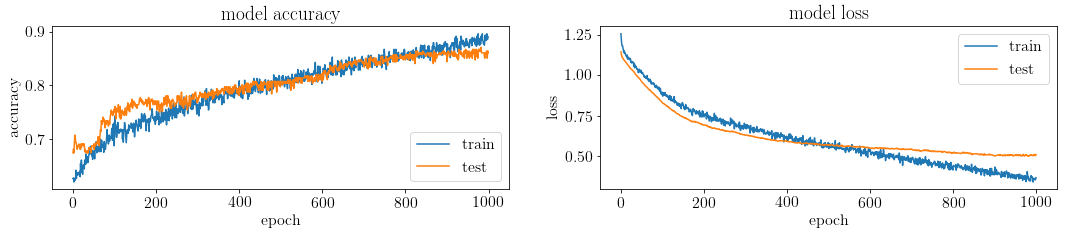

In [8]:
plt.figure(figsize=(18,3))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()